In [26]:
import warnings
warnings.filterwarnings("ignore")

# 0. Quickstart

# Overview
This notebook will show a high-level example of how to use the `cov_bsv` package to extract potential COVID-19 cases from clinical text. For examples, we'll use a few short synthetic texts which illustrate how the pipeline works and what sorts of concepts are extracted.

`cov_bsv` implements a [spaCy](https://spacy.io/) processing pipeline for COVID-19 extraction. This sytem is described in [A Natural Language Processing System for National COVID-19 Surveillance in the US Department of Veterans Affairs](https://openreview.net/forum?id=ZQ_HvBxcdCv) by Chapman et al. This is a **rule-based NLP system** which identifies mentions of COVID-19, asserts attributes indicating whether or not the mention is positive, and classifies a document based on the entities in the Doc.

This notebook shows how to use the default model and knowledge base implemented in this package. This is close (but not exactly identical) to the system described in the paper above. However, you will likely need to customize your pipeline based on your data and needs. But hopefully we've made that easy to do! The subsequent notebooks will show how each component works, how you can add new rules, and how to remove/add
components to the pipeline. This will allow you to adjust the system to your data and use case, or even use the underlying tools to build your own system from scratch.

Our system leverages components which are published in the [medspacy](https://github.com/medspacy/medspacy) package. When you load the default model, you won't need to worry about how to import and instantiate these components, but future notebooks will show examples of how to do this.

## Background
For background on the motivation for this pipeline and how it was used in the VA, you can read the ACL paper:
[A Natural Language Processing System for National COVID-19 Surveillance in the US Department of Veterans Affairs](https://openreview.net/forum?id=ZQ_HvBxcdCv)


And watch the pre-recorded presentation from ther ACL 2020 Emergency COVID-19 Workshop:

In [27]:
from IPython.display import YouTubeVideo

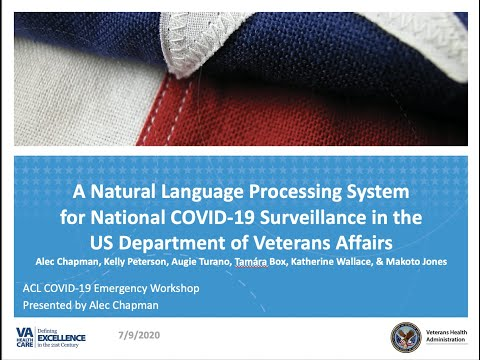

In [28]:
YouTubeVideo("alBnBPtFEAw")

## Example Data
The following short document show examples of the sorts of text this system was built to process. Each sentence mentions COVID-19, but not all are positive. For example:
- The patient may have been **tested** for COVID-19, but it hasn't been confirmed
- **Someone other than the patient** may have been diagnosed with COVID-19
- The patient may be described as explicitly **negative**

In all of these scenarios, we need to recognize that these are not positive cases and differentiate from those where the patient is actually **positive** for COVID-19.

In [29]:
texts = [
    """Patient presents to be tested for COVID-19. 
    His wife recently tested positive for novel coronavirus.

    SARS-COV-2 results came back positive.""",
    
    """Has the patient been diagnosed with COVID-19? Y/N
    Lab results:
    SARS-COV-2 not detected

    Diagnoses: 
    1. COVID-19 testing
    """,
    
    """The patient was tested for COVID-19. Results are positive.""",
    
    "negative for COVID-19.",
    
    """Problem List:
    1. Pneumonia
    2. Novel Coronavirus 2019
    """
]

# Loading our pipeline
We can import `cov_bsv` and then use `cov_bsv.load()` to load the spaCy pipeline.

In [30]:
import cov_bsv

In [31]:
nlp = cov_bsv.load()

In [32]:
nlp

In [33]:
nlp.pipe_names

['tagger',
 'parser',
 'concept_tagger',
 'target_matcher',
 'sectionizer',
 'context',
 'postprocessor',
 'document_classifier']

`cov_bsv.load()` includes the following optional arguments:
- `model`: The name of a spaCy model to load as a base model
- `enable`: Component names to include in the loaded pipeline
- `disable`: Component names to exclude from the loaded pipeline
- `load_rules`: Whether to load the rules defined in the `cov_bsv.knowledge_base` module. If `False`, will load the pipeline components blank without rules added
- `set_attributes`: Whether to register the custom extensions used in the knowledge base rules

# Processing Text
Now, let's process our texts. This looks exactly identical to regular spaCy processing:

In [34]:
docs = list(nlp.pipe(texts))

In [35]:
print(docs)

[Patient presents to be tested for COVID-19. 
    His wife recently tested positive for novel coronavirus.

    SARS-COV-2 results came back positive., 
    Lab results:
    SARS-COV-2 not detected

    Diagnoses: 
    1. COVID-19 testing
    , The patient was tested for COVID-19. Results are positive., negative for COVID-19., Problem List:
    1. Pneumonia
    2. Novel Coronavirus 2019
    ]


# View the results
Now let's see what our pipeline extracted. The main point of the pipeline is to assign a document classification. This label is assigned to the `doc._.cov_classification` attribute:

In [36]:
for doc in docs:
    print(doc._.cov_classification)

POS
NEG
POS
NEG
POS


Extracted mentions of COVID-19 will be stored in `doc.ents`:

In [37]:
for doc in docs:
    for ent in doc.ents:
        print(ent)

COVID-19
novel coronavirus
SARS-COV-2
SARS-COV-2
COVID-19
COVID-19
COVID-19
Novel Coronavirus 2019


## Visualization
It's useful to be able to inspect the results of the model. The function `visualize_doc` builds on top of `spacy.displacy` to visualize the concepts extracted from the model. The document classification is shown as a header. The body of the document is highlighted with entity labels, contextual modifiers, and section titles.

This allows us to inspect the results for each document and debug why it was classified as positive. Let's visualize each document and see what classification was made.

In [38]:
for i, doc in enumerate(docs):
    cov_bsv.visualize_doc(doc, document_id=i)
    print("__"*20)

________________________________________


________________________________________


________________________________________


________________________________________


________________________________________


# Next Steps
Now that we've seen what the basic workflow looks like, let's look under the hood to see what processing steps are taken. 

First, we'll see how the pipeline extracts mentions of COVID-19. Then we'll see how how to assert attributes indicating whether or not the patient is positive for COVID-19. We'll then use those concepts to make a document-level classification. Finally, we'll show how to handle special cases or data issues using pre- and postprocessing.

[01-target-matching.ipynb](01-target-matching.ipynb)